# Install necessary packages

In [ ]:
# 1. Install nx-arangodb via pip
# Github: https://github.com/arangodb/nx-arangodb

!pip install nx-arangodb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which

In [ ]:
# 2. Check if you have an NVIDIA GPU
# Note: If this returns "command not found", then GPU-based algorithms via cuGraph are unavailable

!nvidia-smi
!nvcc --version

/bin/bash: line 1: nvidia-smi: command not found
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [ ]:
# 3. Install nx-cugraph via pip
# Note: Only enable this installation if the step above is working!

!pip install nx-cugraph-cu12 --extra-index-url https://pypi.nvidia.com # Requires CUDA-capable GPU

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com


In [ ]:
# 4. Install LangChain & LangGraph

!pip install --upgrade langchain langchain-community langchain-openai langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.4/415.4 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.40
    Uninstalling langchain-core-0.3.40:
      Successfully uninstalled langchain-core-0.3.40
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.19
    Uninstalling langchain-0.3.19:
      Successfully uninstalled langchain-0.3.19


In [ ]:
pip install pyArango


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 18.6 MB/s eta 0:00:00
  Created wheel for pyArango: filename=pyArango-2.1.1-py2.py3-none-any.whl size=53233 sha256=420761dc14bcc55b9caf15c328f316f2a8f9e5cdb1936c47b0e8a3554b68c003
  Stored in directory: /root/.cache/pip/wheels/c6/7e/13/19e5408e459cb347796f7a51b4394976d8107a1cb68a060892
Successfully built pyArango


# Import required modules

In [ ]:
# 5. Import the required modules

import networkx as nx
import nx_arangodb as nxadb

from arango import ArangoClient

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint
import re

from langgraph.prebuilt import create_react_agent
from langgraph.checkpoint.memory import MemorySaver
from langchain_openai import ChatOpenAI
from langchain_community.graphs import ArangoGraph
from langchain_community.chains.graph_qa.arangodb import ArangoGraphQAChain
#from langchain_core.tools import tool
from langchain.agents import tool
from langchain_core.messages import AIMessage

[22:39:50 +0000] [INFO]: NetworkX-cuGraph is available.
INFO:nx_arangodb:NetworkX-cuGraph is available.


In [ ]:
# Langchain imports
from langchain.agents import Tool, AgentExecutor, LLMSingleActionAgent, AgentOutputParser
from langchain.prompts import BaseChatPromptTemplate, ChatPromptTemplate
from langchain import LLMChain
from langchain.schema import AgentAction, AgentFinish, HumanMessage, SystemMessage
# LLM wrapper
from langchain.chat_models import ChatOpenAI
from langchain import OpenAI
# Conversational memory
from langchain.memory import ConversationBufferWindowMemory
# Embeddings and vectorstore
from langchain.embeddings.openai import OpenAIEmbeddings

# Connect to ArangoDB

In [ ]:
# Connect to the ArangoDB database
# Configure your credentials here

db = ArangoClient(hosts="https://9cc4f92f2a8b.arangodb.cloud:8529").db("DebyDB", username="root", password="Enter Password", verify=True)

print(db)

<StandardDatabase DebyDB>


In [ ]:
# 2. Re-connect to the same Graph

G_adb = nxadb.DiGraph(name="DependencyGraph", db=db)

print(G_adb)

[22:45:18 +0000] [INFO]: Graph 'DependencyGraph' exists.
INFO:nx_arangodb:Graph 'DependencyGraph' exists.
[22:45:18 +0000] [INFO]: Default node type set to 'Sink'
INFO:nx_arangodb:Default node type set to 'Sink'


DiGraph named 'DependencyGraph' with 58 nodes and 56 edges


In [ ]:
# 3. Print the degree of a Node

G_adb.degree('ECOM.v_OrdersWithShippingInfo')

3

In [ ]:
# 1. Create the ArangoGraph LangChain wrapper
# Reference: https://api.python.langchain.com/en/latest/graphs/langchain_community.graphs.arangodb_graph.ArangoGraph.html

arango_graph = ArangoGraph(db)

# Create tools for AI agent

In [ ]:
# 2. Define the llm object
# Note: You can use any llm you want. We will be using OpenAI for example purposes.

import os

os.environ["OPENAI_API_KEY"] = "Enter Key"

llm = ChatOpenAI(temperature=0, model_name="gpt-4o")


In [ ]:
# Simple tool to provide a self-introduction
@tool
def who_am_i(query: str):
    """Your name is DEBy. You are a data engineer's assistant. You help with tasks like intelligent data lineage tracking, query forumulation, data retrieval and much more.
    Whenever asked who you are you must respond with an answer that takes the above text into account.
    """

In [ ]:
# Limit responses to those that are relavent to data & data engineering
@tool
def out_of_scope(query: str):
    """Any question that is not related to data or data engineering should be answered with this tool.
    Let the user know who you are. Then tell them that the question is irrelavent to your job function. Let them know that you are here to help with data related queries.
    """

In [ ]:
# 4. Define the Text to AQL Tool
# Reference: https://python.langchain.com/docs/integrations/graphs/arangodb/
# Reference: https://python.langchain.com/api_reference/community/chains/langchain_community.chains.graph_qa.arangodb.ArangoGraphQAChain.html
# Note: It is encouraged to experiment and improve this section! This is just a placeholder:

@tool
def text_to_aql_to_text(query: str):
    """This tool is available to invoke the
    ArangoGraphQAChain object, which enables you to
    translate a Natural Language Query into AQL, execute
    the query, and translate the result back into Natural Language.
    Never use this to find upstream or downstream dependencies
    """

    llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

    chain = ArangoGraphQAChain.from_llm(
    	llm=llm,
    	graph=arango_graph,
    	verbose=True,
        allow_dangerous_requests=True
    )

    result = chain.invoke(query)

    return str(result["result"])

In [ ]:
# 5. Define the Text to NetworkX/cuGraph Tool
# Made slight modifications to use DiGraph

@tool
def text_to_nx_algorithm_to_text(query):
    """This tool is available to invoke a NetworkX Algorithm on
    the ArangoDB DiGraph. You are responsible for accepting the
    Natural Language Query, establishing which algorithm needs to
    be executed, executing the algorithm, and translating the results back
    to Natural Language, with respect to the original query.

    If the query (e.g traversals, shortest path, etc.) can be solved using the Arango Query Language, then do not use
    this tool.
    """

    llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

    ######################
    print("1) Generating NetworkX code")

    text_to_nx = llm.invoke(f"""
    I have a NetworkX DiGraph called `G_adb`. It has the following schema: {arango_graph.schema}

    I have the following graph analysis query: {query}.

    Generate the Python Code required to answer the query using the `G_adb` object.

    Be very precise on the NetworkX algorithm you select to answer this query. Think step by step.

    Only assume that networkx is installed, and other base python dependencies.

    Always set the last variable as `FINAL_RESULT`, which represents the answer to the original query.

    Only provide python code that I can directly execute via `exec()`. Do not provide any instructions.

    Make sure that `FINAL_RESULT` stores a short & consice answer. Avoid setting this variable to a long sequence.

    Your code:
    """).content

    text_to_nx_cleaned = re.sub(r"^```python\n|```$", "", text_to_nx, flags=re.MULTILINE).strip()

    print('-'*10)
    print(text_to_nx_cleaned)
    print('-'*10)

    ######################

    print("\n2) Executing NetworkX code")
    global_vars = {"G_adb": G_adb, "nx": nx}
    local_vars = {}

    try:
        exec(text_to_nx_cleaned, global_vars, local_vars)
        text_to_nx_final = text_to_nx
    except Exception as e:
        print(f"EXEC ERROR: {e}")
        return f"EXEC ERROR: {e}"

        # TODO: Consider experimenting with a code corrector!
        attempt = 1
        MAX_ATTEMPTS = 3

        # while attempt <= MAX_ATTEMPTS
            # ...

    print('-'*10)
    FINAL_RESULT = local_vars["FINAL_RESULT"]
    print(f"FINAL_RESULT: {FINAL_RESULT}")
    print('-'*10)

    ######################

    print("3) Formulating final answer")

    nx_to_text = llm.invoke(f"""
        I have a NetworkX DiGraph called `G_adb`. It has the following schema: {arango_graph.schema}

        I have the following graph analysis query: {query}.

        I have executed the following python code to help me answer my query:

        ---
        {text_to_nx_final}
        ---

        The `FINAL_RESULT` variable is set to the following: {FINAL_RESULT}.

        Based on my original Query and FINAL_RESULT, generate a short and concise response to
        answer my query.

        Your response:
    """).content

    return nx_to_text

In [ ]:
# Use AQL to find the immediate parents of an SQL object
# Zero shot prompting
@tool
def get_source_objects(query: str):
  """ Use this tool to get the source objects of an SQL object like a table or view.
  """
  return text_to_aql_to_text(query+"Find the parents of the node")

In [ ]:
# Use NetworkX to find the downstream dependencies
# Chain-Of-thought prompting
# Here I'm providing detailed instructions so that the llm doesn't hallucinate &
# look at other data cataloging & lineage resources
@tool
def get_sink_tree(query: str):
  """ Use this tool to get the sink tree of an SQL object like a table or view
  It can be used to trace the downstream dependencies of the SQL object
  It can be used to determine which objects might be impacted due to any modifications in its definition
  """
  q1 = text_to_nx_algorithm_to_text(query+"""Follow the following steps to find the sink tree:
  1. If you are trying this tool print trying get_sink_tree
  2. Get the name of the SQL object from the query
  3. Find the node from the graph that has the same or similar name so use this code:
  target_node = None
  for node, data in G_adb.nodes(data=True):
    if data.get('_key') == sql_object_name:
        target_node = node
        break
  4. Convert ArangoDB graph to NetwrokX graph like so:
  nx_graph = nx.DiGraph()  # Create an empty NetworkX DiGraph
  for source, target, data in G_adb.edges():
    nx_graph.add_edge(source, target)
  5. Find all the nodes that are reachable from this node in the graph. This is a directed graph so use this python code:
  descendants = set(nx.descendants(nx_graph, target_node))
  ancestors = set(nx.ancestors(nx_graph, target_node))
  sinks = list(descendants - ancestors)
  6. Analyse the answer & only return the SQL objects that are consuming data from the SQL object provided by the user
  """)
  llm = ChatOpenAI(temperature=0, model_name="gpt-4o")
  prompt = q1 + 'Analyse the answer & return only the list of SQL objects that are consuming data from the SQL object provided by the user'
  response = llm.invoke(prompt)
  if isinstance(response, AIMessage):
    return response.content
  else:
    return str(response)

In [ ]:
# Use NetworkX to find the upsteam dependencies
# I'm providing detailed instructions & sample code snippets to
# prevent the llms from making assumptions abt the nature of relationships
@tool
def get_source_tree(query: str):
  """ Use this tool to get the source tree of an SQL object like a table or view
  It can be used to trace the upstream dependencies of the SQL object
  It can be used to determine which objects provide data to the object mentioned by the user
  """
  q1 = text_to_nx_algorithm_to_text(query+"""Follow the following steps to find the sink tree:
  1. If you are trying this tool print trying get_source_tree
  2. Get the name of the SQL object from the query
  3. Find the node from the graph that has the same or similar name so use this code:
  target_node = None
  for node, data in G_adb.nodes(data=True):
    if data.get('_key') == sql_object_name:
        target_node = node
        break
  4. Make sure to created a NetworkX DiGraph using the nx_graph.add_edge_from() function:
  nx_graph = nx.DiGraph()  # Create an empty NetworkX DiGraph
  for source, target, data in G_adb.edges():
    nx_graph.add_edge_from(source, target)
  5. Find all the nodes that are reachable from this node in the graph. This is a directed graph so use this python code:
  ancestors = list(nx.ancestors(nx_graph, target_node))
  """)
  llm = ChatOpenAI(temperature=0, model_name="gpt-4o")
  prompt = q1 + 'Analyse the answer & return only the list of SQL objects that are providing data to the SQL object provided by the user. The first part of the names i.e, Sink/, Source/ are related to the graph not names of the objects so omit them.'
  response = llm.invoke(prompt)
  if isinstance(response, AIMessage):
    return response.content
  else:
    return str(response)

In [ ]:
# Simple tool to query the RefreshDetails Collection
# Returns the scheduled refresh time of a table
from pyArango.connection import *
@tool
def get_table_refreshTime(query):
  """
  Tool to find the refresh time of a table
  """
# Connect to ArangoDB
  conn = Connection(arangoURL="https://9cc4f92f2a8b.arangodb.cloud:8529", username="root", password="Enter password")
  db=conn["DebyDB"]

# Define the collection you want to query
  collection_name = "RefreshDetails"

  llm = ChatOpenAI(temperature=0, model_name="gpt-4o")
  prompt = """Find the schema & table name. the answer in the format schema.table name nothing else
  If the input is a string with no spaces, return that as the answer"""
  prompt = query + prompt
  response = llm.invoke(prompt)
  if isinstance(response, AIMessage):
    value= response.content
  else:
    value= str(response)
  print(value)

# Define the document key you want to query
  document_key = "your_document_key"
  keyname='TableName'
  aql_query = f'''
  FOR doc IN {collection_name}
      FILTER doc.{keyname} == "{value}"
      RETURN doc
  '''

# Use db.query() instead of db.AQLQuery()
  cursor = db.AQLQuery(aql_query, rawResults=True)  # Execute the AQL query

  # Print the result
  for doc in cursor:  # Iterate through the cursor to get results
      return(doc['Time'])

In [ ]:
get_table_refreshTime('ECOM.v_UserFullName')

ECOM.v_UserFullName


'2:26 AM'

In [ ]:
# Use this tool for visualizations
# Zero shot prompting
@tool
def text_to_nx_visualization(query):
       """This tool is available to convert an nx graph into a visualization
       """

       llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

       ######################
       print("1) Generating Visualization code")

       text_to_nx = llm.invoke(query+f"""
       Once you have the data for creating the viualization,
       write a python code to convert that data into a visualization using a library like matplotlib.
       Assume all the libraries have been installed. Generate just the python code. Don't generate an explanation.
       """).content

       text_to_nx_cleaned = re.sub(r"^```python\n|```$", "", text_to_nx, flags=re.MULTILINE).strip()
       text_to_nx_cleaned = re.sub(r"^$", "", text_to_nx_cleaned, flags=re.MULTILINE).strip()
       text_to_nx_cleaned = text_to_nx_cleaned.replace("'", "\"\"\"")

       print('-'*10)
       print(text_to_nx_cleaned)
       print('-'*10)

       ######################

       print("\n2) Executing visualization code")

       try:
           # Use globals() and locals() to ensure matplotlib functions are accessible
           # Execute the code and capture the result
           exec(text_to_nx_cleaned, globals(), locals())

           # Assuming the code generates a plot object called 'plt'
           # or similar
           # This part handles different possible outputs from the LLM-generated code
           # This will help to extract the visualization and store/display it
           if 'plt' in locals():
               # Return a descriptive string for debugging & ensure the Agent understands.
               # consider saving the visualization
               plt.savefig("visualization.png")
               return "Visualization created and saved as visualization.png"
           elif 'fig' in locals():
               # Return a descriptive string for debugging & ensure the Agent understands.
               # Consider saving the visualization
               fig.savefig("visualization.png")
               return "Visualization created and saved as visualization.png"
           else:
               # Return a descriptive string for debugging & ensure the Agent understands.
               # Consider saving the visualization if a different object is created
               return "Visualization created, but output object is not recognized."

       except Exception as e:
           # Return the error message for the agent to handle
           print(f"EXEC ERROR: {e}")
           return f"EXEC ERROR: {e}"


In [ ]:
# Use this tool to schedule table refreshes
# Chain of thought prompting
@tool
def create_refresh_table(query: str):
  """ Use this tool only after calculating the refresh schedule & schedule of downsteam dependencies.
  This can be used to generate refresh schedule visualization of SQL objects like tables
  """

  llm = ChatOpenAI(temperature=0, model_name="gpt-4o")
  prompt = query + """
  Follow the given steps:
  1. Find the downstream dependencies using get_sink_tree tool
  2. If the refresh times of the dependent tables are lesser than the new refresh time then change it
  3. Return only the table names, the original refresh time, the newly calculated refresh times
  """
  response = llm.invoke(prompt)
  if isinstance(response, AIMessage):
    text_to_visualization(response.content+"""
    Using the above data create a table visualization.
    Create a table name column, an original refresh time column & a new refresh time column.
    The values in the table name column should contain the schema.
    The values in the original refresh time column should only contain the original refresh time.
    The values in the refresh time column should only contain the time that was calculated previously.
    Do not include any additional values in the table apart from those provided in the previous step
    """)
  else:
    text_to_visualization(str(response))

In [ ]:
# For CRUD operations
# Zero shot prompting

@tool
def create_node_query(query: str):
    """This tool is available to generate AQL code to create, read, update or delete nodes in the ArangoDB graph
    """

    llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

    chain = ArangoGraphQAChain.from_llm(
    	llm=llm,
    	graph=arango_graph,
    	verbose=True,
        allow_dangerous_requests=True
    )

    result = chain.invoke(query)

    return str(result["result"])

In [ ]:
tools = [
    Tool(
        name='get_source_objects',
        func=get_source_objects,
        description='Use this tool to get the source objects of an SQL object like a table or view.'
    ),
    Tool(
        name='get_sink_tree',
        func=get_sink_tree,
        description='Use this tool to find the sink tree of an SQL object like a table or view. This can also be used to find the downstream dependencies. Can be used to find the objects impacted by any modifications to the object mentioned by the user'
    ),
    Tool(
        name='get_source_tree',
        func=get_source_tree,
        description='Use this tool to find the source tree of an SQL object like a table or view. This can also be used to find the upstream dependencies. Can be used to find the objects that provide data to the object mentioned by the user'
    ),
    Tool(
        name='who_am_i',
        func=who_am_i,
        description='Use this tool to talk about yourself'
    ),
    Tool(
        name='text_to_aql_to_text',
        func=text_to_aql_to_text,
        description="""This tool is available to invoke the
    ArangoGraphQAChain object, which enables you to
    translate a Natural Language Query into AQL, execute
    the query, and translate the result back into Natural Language.
    Never use this tool for tasks involving upstream or downstream dependencies
    """
    ),
    Tool(
        name='text_to_nx_algorithm_to_text',
        func=text_to_nx_algorithm_to_text,
        description="""This tool is available to invoke a NetworkX Algorithm on
    the ArangoDB DiGraph. You are responsible for accepting the
    Natural Language Query, establishing which algorithm needs to
    be executed, executing the algorithm, and translating the results back
    to Natural Language, with respect to the original query.

    If the query (e.g traversals, shortest path, etc.) can be solved using the Arango Query Language, then do not use
    this tool.
    """
    ),
    Tool(
        name='get_table_refreshTime',
        func=get_table_refreshTime,
        description="""To find the refresh time of a table
        """
    ),
    Tool(
        name='text_to_nx_visualization',
        func=text_to_nx_visualization,
        description="""This tool is available to convert data into a visualization
        """
    ),
    Tool(
        name='create_refresh_table',
        func=create_refresh_table,
        description="""Use this tool only after calculating the refresh schedule and downstream dependencies.
        This can be used to generate refresh schedule visualization of SQL objects like tables.
        Do not use this tool for visualization of downstream dependencies
        """
    ),
    Tool(
        name='create_node_query',
        func=create_node_query,
        description="""This tool is available to generate code to create, read, update or delete nodes in the ArangoDB graph
        """
    )
]

# Setting up prompt templates

In [ ]:
# Set up a prompt template which can interpolate the history
template_with_history = """You are DEBy, an intelligent Data Engineer's assistant who provides informative answers to users regarding data & data engineering.
Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin! Remember to give detailed, informative answers

Previous conversation history:
{history}

New question: {input}
{agent_scratchpad}"""

In [ ]:
from typing import List, Union
from langchain.tools import BaseTool

# Set up a prompt template
class CustomPromptTemplate(BaseChatPromptTemplate):
    # The template to use
    template: str
    # The list of tools available
    tools: List[Tool]

    def format_messages(self, **kwargs) -> str:
        # Get the intermediate steps (AgentAction, Observation tuples)

        # Format them in a particular way
        intermediate_steps = kwargs.pop("intermediate_steps")
        thoughts = ""
        for action, observation in intermediate_steps:
            thoughts += action.log
            thoughts += f"\nObservation: {observation}\nThought: "

        # Set the agent_scratchpad variable to that value
        kwargs["agent_scratchpad"] = thoughts

        # Create a tools variable from the list of tools provided
        kwargs["tools"] = "\n".join([f"{tool.name}: {tool.description}" for tool in self.tools])

        # Create a list of tool names for the tools provided
        kwargs["tool_names"] = ", ".join([tool.name for tool in self.tools])
        formatted = self.template.format(**kwargs)
        return [HumanMessage(content=formatted)]

prompt = CustomPromptTemplate(
    template=template_with_history,
    tools=tools,
    # This omits the `agent_scratchpad`, `tools`, and `tool_names` variables because those are generated dynamically
    # This includes the `intermediate_steps` variable because that is needed
    input_variables=["input", "intermediate_steps"]
)

In [ ]:
class CustomOutputParser(AgentOutputParser):

    def parse(self, llm_output: str) -> Union[AgentAction, AgentFinish]:

        # Check if agent should finish
        if "Final Answer:" in llm_output:
            return AgentFinish(
                # Return values is generally always a dictionary with a single `output` key
                # It is not recommended to try anything else at the moment :)
                return_values={"output": llm_output.split("Final Answer:")[-1].strip()},
                log=llm_output,
            )

        # Check if the output contains the answer without following the expected format.
        # This is an adjustment to handle the conversational response.
        if "I now know the final answer." in llm_output:
            return AgentFinish(
                return_values={"output": llm_output.split("I now know the final answer.")[-1].strip()},
                log=llm_output,
            )


        # Parse out the action and action input
        regex = r"Action\s?:\s?(.*?)\nAction\s?Input\s?:\s?(.*)"
        match = re.search(regex, llm_output, re.IGNORECASE | re.DOTALL)

        # If it can't parse the output it raises an error
        # You can add your own logic here to handle errors in a different way i.e. pass to a human, give a canned response
        if 'error' in llm_output: #not match:
            raise ValueError(f"Could not parse LLM output: `{llm_output}`")
        action = None
        action_input=None
        if match != None:
          action = match.group(1).strip()
          action_input = match.group(2)

        if action == None or action_input==None:
          return AgentFinish(
                return_values={"output": llm_output.strip()},
                log=llm_output,
            )

        # Return the action and action input
        return AgentAction(tool=action, tool_input=action_input.strip(" ").strip('"'), log=llm_output)

output_parser = CustomOutputParser()

# Setting up the agent

In [ ]:
prompt_with_history = CustomPromptTemplate(
    template=template_with_history,
    tools=tools,
    # The history template includes "history" as an input variable so we can interpolate it into the prompt
    input_variables=["input", "intermediate_steps", "history"]
)

llm_chain = LLMChain(llm=llm, prompt=prompt_with_history)
tool_names = [tool.name for tool in tools]
agent = LLMSingleActionAgent(
    llm_chain=llm_chain,
    output_parser=output_parser,
    stop=["\nObservation:"],
    allowed_tools=tool_names
)

In [ ]:
# Initiate the memory with k=2 to keep the last two turns
# Provide the memory to the agent
memory = ConversationBufferWindowMemory(k=2)
agent_executor = AgentExecutor.from_agent_and_tools(agent=agent, tools=tools, verbose=True, memory=memory)

# Q&A with DEBy

In [ ]:
# Simple question - Introduce yourself
agent_executor.run("Who are you")



> Entering new AgentExecutor chain...
Thought: The user is asking about my identity, so I should use the "who_am_i" tool to provide an appropriate response.
Action: who_am_i
Action Input: None

Observation:None
I am DEBy, an intelligent Data Engineer's assistant. I am here to provide informative answers and assist you with tasks related to data and data engineering. I can help you with understanding data dependencies, generating code for data operations, creating visualizations, and more. If you have any questions or need assistance, feel free to ask!

> Finished chain.


"I am DEBy, an intelligent Data Engineer's assistant. I am here to provide informative answers and assist you with tasks related to data and data engineering. I can help you with understanding data dependencies, generating code for data operations, creating visualizations, and more. If you have any questions or need assistance, feel free to ask!"

In [ ]:
# Question to make the agent generate an AQL script
agent_executor.run("Find the source of ECOM.v_PaymentsWithOrderInfo")



> Entering new AgentExecutor chain...
To find the source of `ECOM.v_PaymentsWithOrderInfo`, I will retrieve the source objects that provide data to this view.

Action: get_source_objects
Action Input: ECOM.v_PaymentsWithOrderInfo

> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH Sink, Mapping, Source
FOR v, e, p IN 1..1 INBOUND 'Sink/ECOM.v_PaymentsWithOrderInfo' Mapping
RETURN v

AQL Result:
[{'_key': 'ECOM.Orders', '_id': 'Source/ECOM.Orders', '_rev': '_jSQBW3i--B'}, {'_key': 'ECOM.Payments', '_id': 'Source/ECOM.Payments', '_rev': '_jSQBW3i--D'}]

> Finished chain.


Observation:The node 'ECOM.v_PaymentsWithOrderInfo' has two parent nodes. These parent nodes are 'ECOM.Orders' and 'ECOM.Payments'.
The source objects for `ECOM.v_PaymentsWithOrderInfo` are `ECOM.Orders` and `ECOM.Payments`. These tables provide the data that is used to create the view `ECOM.v_PaymentsWithOrderInfo`.

> Finished chain.


'The source objects for `ECOM.v_PaymentsWithOrderInfo` are `ECOM.Orders` and `ECOM.Payments`. These tables provide the data that is used to create the view `ECOM.v_PaymentsWithOrderInfo`.'

In [ ]:
# Question to find the downstream dependencies of an object
agent_executor.run("Find the sink tree of ECOM.v_PaymentsWithOrderInfo")



> Entering new AgentExecutor chain...
Sure, let me find the sink tree for the view `ECOM.v_PaymentsWithOrderInfo` to identify its downstream dependencies.

Action: get_sink_tree
Action Input: ECOM.v_PaymentsWithOrderInfo1) Generating NetworkX code
----------
import networkx as nx

# Step 1: Print trying get_sink_tree
print("trying get_sink_tree")

# Step 2: Get the name of the SQL object from the query
sql_object_name = "ECOM.v_PaymentsWithOrderInfo"

# Step 3: Find the node from the graph that has the same or similar name
target_node = None
for node, data in G_adb.nodes(data=True):
    if data.get('_key') == sql_object_name:
        target_node = node
        break

# Step 4: Convert ArangoDB graph to NetworkX graph
nx_graph = nx.DiGraph()  # Create an empty NetworkX DiGraph
for source, target, data in G_adb.edges(data=True):
    nx_graph.add_edge(source, target)

# Step 5: Find all the nodes that are reachable from this node in the graph
descendants = set(nx.descendants(nx_graph, t

'The view `ECOM.v_PaymentsWithOrderInfo` does not have any downstream dependencies, meaning there are no SQL objects that consume data from this view.'

In [ ]:
# Same question, see how the agent retains the memory
agent_executor.run("Find the downstream dependencies of ECOM.v_PaymentsWithOrderInfo")



> Entering new AgentExecutor chain...
The view `ECOM.v_PaymentsWithOrderInfo` does not have any downstream dependencies. This means there are no SQL objects that consume data from this view.

> Finished chain.


'The view `ECOM.v_PaymentsWithOrderInfo` does not have any downstream dependencies. This means there are no SQL objects that consume data from this view.'

In [ ]:
# Get the upstream dependencies. Should generate a NetworkX graph
agent_executor.run("Find the upsteam dependencies of ECOM.v_PaymentsWithOrderInfo")



> Entering new AgentExecutor chain...
Sure, let's find the upstream dependencies of the view `ECOM.v_PaymentsWithOrderInfo`. This will help us understand which SQL objects provide data to this view.

Action: get_source_tree
Action Input: ECOM.v_PaymentsWithOrderInfo1) Generating NetworkX code
----------
import networkx as nx

# Step 1: Print trying get_source_tree
print("trying get_source_tree")

# Step 2: Get the name of the SQL object from the query
sql_object_name = "ECOM.v_PaymentsWithOrderInfo"

# Step 3: Find the node from the graph that has the same or similar name
target_node = None
for node, data in G_adb.nodes(data=True):
    if data.get('_key') == sql_object_name:
        target_node = node
        break

# Step 4: Create a NetworkX DiGraph using the nx_graph.add_edge_from() function
nx_graph = nx.DiGraph()  # Create an empty NetworkX DiGraph
for source, target, data in G_adb.edges(data=True):
    nx_graph.add_edge(source, target)

# Step 5: Find all the nodes that are rea

'The upstream dependencies of the view `ECOM.v_PaymentsWithOrderInfo` are the tables `ECOM.Orders` and `ECOM.Payments`. This means that the data for this view is sourced from these two tables.'

In [ ]:
# AQL + NetworkX
# First the Agent should find the parents using AQL then get upstream dependencies using NetworkX
agent_executor.run("Find the upsteam dependencies of the parent tables of ECOM.v_PaymentsWithOrderInfo")



> Entering new AgentExecutor chain...
To find the upstream dependencies of the parent tables of `ECOM.v_PaymentsWithOrderInfo`, we need to first identify the parent tables of this view and then trace their upstream dependencies.

Let's start by identifying the parent tables of `ECOM.v_PaymentsWithOrderInfo`.

Thought: I will use the `get_source_objects` tool to find the parent tables of `ECOM.v_PaymentsWithOrderInfo`.
Action: get_source_objects
Action Input: ECOM.v_PaymentsWithOrderInfo

> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH Sink, Mapping, Source
FOR vertex, edge, path IN 1..1 INBOUND 'Sink/ECOM.v_PaymentsWithOrderInfo' Mapping
RETURN vertex

AQL Result:
[{'_key': 'ECOM.Orders', '_id': 'Source/ECOM.Orders', '_rev': '_jSQBW3i--B'}, {'_key': 'ECOM.Payments', '_id': 'Source/ECOM.Payments', '_rev': '_jSQBW3i--D'}]

> Finished chain.


Observation:The node "ECOM.v_PaymentsWithOrderInfo" has two parent nodes. These parent nodes are "ECOM.Orders" and "ECOM.Payments"

'The `ECOM.Payments` table also does not have any upstream dependencies in the current graph structure, similar to `ECOM.Orders`. This indicates that either these tables are standalone in the graph or their data sources are not represented in the graph.\n\nTherefore, the upstream dependencies of the parent tables of `ECOM.v_PaymentsWithOrderInfo` are not available in the current graph structure. Both `ECOM.Orders` and `ECOM.Payments` do not have any upstream dependencies listed.'

In [ ]:
# Query data from documents hosted on ArangoDB
agent_executor.run("If there is a refresh delay of 2 hrs in ECOM.Addresses. At what time will it be refreshed")



> Entering new AgentExecutor chain...
To determine the refresh time of `ECOM.Addresses`, I need to find its current refresh schedule. Let's start by retrieving the refresh time of the `ECOM.Addresses` table.

Action: get_table_refreshTime
Action Input: ECOM.AddressesECOM.Addresses


Observation:2:05 PM
The current refresh time for `ECOM.Addresses` is 2:05 PM. If there is a refresh delay of 2 hours, the new refresh time will be 4:05 PM.

> Finished chain.


'The current refresh time for `ECOM.Addresses` is 2:05 PM. If there is a refresh delay of 2 hours, the new refresh time will be 4:05 PM.'

In [ ]:
# Use NetworkX to get the downstream dependencies & finally use refresh table calculations to get the new scheduled times
agent_executor.run("""If there is a refresh delay of 5 hrs in ECOM.Users. Find the new refresh time.
If a tables's scheduled run is lesser than the the refresh time of the delayed table then reschedule it so it runs after the delayed table has refreshed.
Present your answer as a table with all of the dependent objects of the delayed table names on the left & the final refresh times on the right.""")



> Entering new AgentExecutor chain...
To address this question, I need to perform the following steps:

1. Determine the current refresh time of the `ECOM.Users` table.
2. Calculate the new refresh time by adding a 5-hour delay to the current refresh time.
3. Identify all downstream dependencies of the `ECOM.Users` table.
4. For each dependent object, check its scheduled refresh time and adjust it if it is earlier than the new refresh time of `ECOM.Users`.

Let's start by finding the current refresh time of the `ECOM.Users` table.

Thought: I need to find the current refresh time of the `ECOM.Users` table.
Action: get_table_refreshTime
Action Input: ECOM.UsersECOM.Users


Observation:4:55 AM
The current refresh time of the `ECOM.Users` table is 4:55 AM. With a 5-hour delay, the new refresh time will be 9:55 AM. 

Next, I need to identify all downstream dependencies of the `ECOM.Users` table to determine which tables need their refresh times adjusted.

Action: get_sink_tree
Action Inp

'The current refresh time for `ECOM.v_UserBasicInfo` is 10:34 AM, which is later than the new refresh time of `ECOM.Users` at 9:55 AM. Therefore, no adjustment is needed for this object.\n\nNow, I will summarize the adjustments needed for the dependent objects:\n\n| Dependent Object                      | Final Refresh Time |\n|---------------------------------------|--------------------|\n| ECOM.v_OrdersWithUserInfo             | 6:01 PM            |\n| ECOM.v_UserFullName                   | 9:55 AM            |\n| ECOM.v_UserGenderBirthdate            | 9:55 AM            |\n| ECOM.v_ReviewsWithProductUserInfo     | 9:55 AM            |\n| ECOM.v_WishlistWithUserProductInfo    | 9:55 AM            |\n| ECOM.v_UserBasicInfo                  | 10:34 AM           |\n\nThe refresh times for `ECOM.v_UserFullName`, `ECOM.v_UserGenderBirthdate`, `ECOM.v_ReviewsWithProductUserInfo`, and `ECOM.v_WishlistWithUserProductInfo` need to be adjusted to occur after the new refresh time of `ECOM.Use



> Entering new AgentExecutor chain...
To find the upstream dependencies of the view `ECOM.v_PaymentsWithOrderInfo`, I will first retrieve its source tree. Once I have the upstream dependencies, I will create a visualization using matplotlib.

Let's start by finding the upstream dependencies.

Thought: I need to find the upstream dependencies of the view `ECOM.v_PaymentsWithOrderInfo`.
Action: get_source_tree
Action Input: ECOM.v_PaymentsWithOrderInfo1) Generating NetworkX code
----------
import networkx as nx

# Step 1: Print trying get_source_tree
print("trying get_source_tree")

# Step 2: Get the name of the SQL object from the query
sql_object_name = "ECOM.v_PaymentsWithOrderInfo"

# Step 3: Find the node from the graph that has the same or similar name
target_node = None
for node, data in G_adb.nodes(data=True):
    if data.get('_key') == sql_object_name:
        target_node = node
        break

# Step 4: Create a NetworkX DiGraph using the nx_graph.add_edge_from() function
nx_g

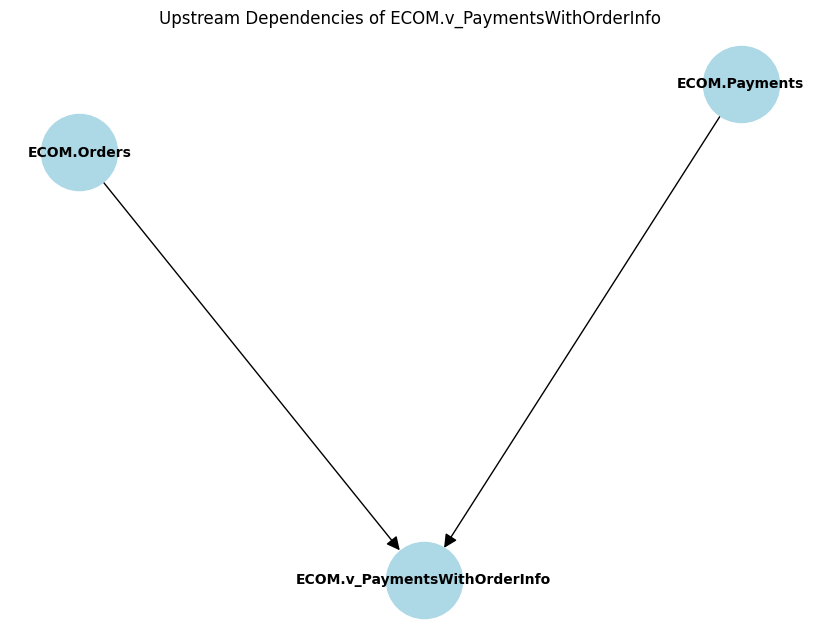



Observation:Visualization created and saved as visualization.png
I have successfully created a visualization using matplotlib to illustrate the upstream dependencies of the view `ECOM.v_PaymentsWithOrderInfo`. The visualization shows the relationship between the view and its source tables, `ECOM.Payments` and `ECOM.Orders`. The visualization is saved as `visualization.png`. If you have any further questions or need additional assistance, feel free to ask!

> Finished chain.


'I have successfully created a visualization using matplotlib to illustrate the upstream dependencies of the view `ECOM.v_PaymentsWithOrderInfo`. The visualization shows the relationship between the view and its source tables, `ECOM.Payments` and `ECOM.Orders`. The visualization is saved as `visualization.png`. If you have any further questions or need additional assistance, feel free to ask!'

<Figure size 640x480 with 0 Axes>

In [ ]:
# Generate the visualization of upstream dependencies. Should generate a NetworkX graph
agent_executor.run("Find the upsteam dependencies of ECOM.v_PaymentsWithOrderInfo and using that information create visualization using matplotlib")



> Entering new AgentExecutor chain...
To generate the refresh schedule visualization for `ECOM.Orders` considering a delay of 2 hours, I need to follow these steps:

1. Determine the current refresh time of the `ECOM.Orders` table.
2. Calculate the new refresh time by adding a 2-hour delay.
3. Identify the downstream dependencies of the `ECOM.Orders` table to understand the impact of the delay.
4. Create a visualization of the updated refresh schedule, including the downstream dependencies.

Let's start by finding the current refresh time of the `ECOM.Orders` table.

Thought: I need to find the current refresh time of the `ECOM.Orders` table.
Action: get_table_refreshTime
Action Input: ECOM.OrdersECOM.Orders


Observation:2:45 PM
I have determined that the current refresh time of the `ECOM.Orders` table is 2:45 PM. Now, I will calculate the new refresh time by adding a 2-hour delay, which will result in a new refresh time of 4:45 PM.

Next, I need to identify the downstream dependenc

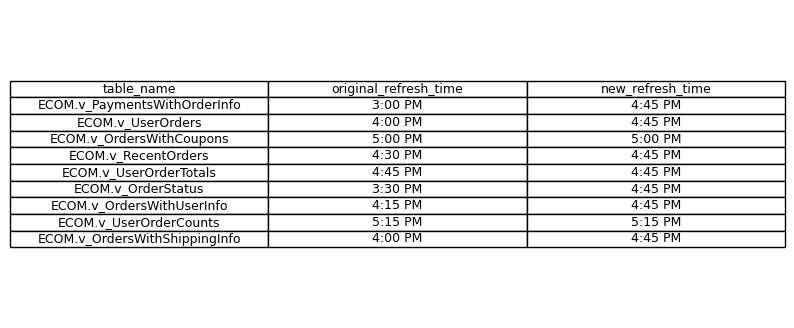



Observation:None
I have successfully created the refresh schedule visualization for the `ECOM.Orders` table, considering a 2-hour delay. The visualization includes the new refresh time of 4:45 PM and highlights the downstream dependencies that are impacted by this delay. This visualization can help in understanding the cascading effects of the delay on the dependent views and assist in planning any necessary adjustments.

> Finished chain.


'I have successfully created the refresh schedule visualization for the `ECOM.Orders` table, considering a 2-hour delay. The visualization includes the new refresh time of 4:45 PM and highlights the downstream dependencies that are impacted by this delay. This visualization can help in understanding the cascading effects of the delay on the dependent views and assist in planning any necessary adjustments.'

<Figure size 640x480 with 0 Axes>

In [ ]:
# Get the upstream dependencies. Should generate a NetworkX graph
agent_executor.run("Generate the refresh schedule visualization of ECOM.Orders if it got delayed by 2 hrs ")



> Entering new AgentExecutor chain...
To generate the AQL code to add a node for the table `ECOM.Phones` to the DependencyGraph and create a visualization of its dependencies, I will first identify the source objects involved in the table creation. Then, I will generate the AQL code to add the node and establish the dependencies. Finally, I will create a visualization of these dependencies.

Let's start by identifying the source objects for the table `ECOM.Phones`.

### Step 1: Identify Source Objects
The table `ECOM.Phones` is created using the following SQL structure:
```sql
CREATE TABLE ECOM.Phones AS
SELECT o.OrderID, o.OrderStatus, p.PaymentStatus
FROM ECOM.Apple o
JOIN ECOM.Samsung p ON o.OrderID = p.OrderID;
```
The source objects are `ECOM.Apple` and `ECOM.Samsung`.

### Step 2: Generate AQL Code to Add Node and Establish Dependencies
Now, I will generate the AQL code to add a node for `ECOM.Phones` and establish its dependencies with `ECOM.Apple` and `ECOM.Samsung`.

```aql


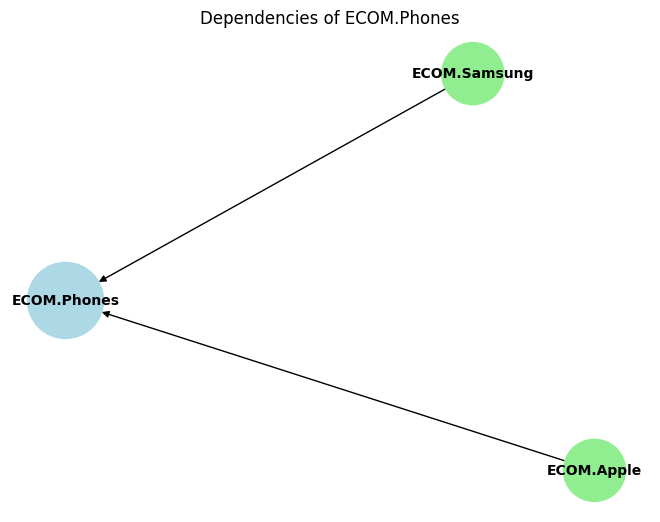



Observation:Visualization created and saved as visualization.png
I have successfully generated the AQL code to add a node for the table `ECOM.Phones` to the DependencyGraph and established its dependencies with `ECOM.Apple` and `ECOM.Samsung`. Additionally, I have created a visualization of these dependencies, which illustrates the relationships between `ECOM.Phones` and its source tables. If you have any further questions or need additional assistance, feel free to ask!

> Finished chain.


'I have successfully generated the AQL code to add a node for the table `ECOM.Phones` to the DependencyGraph and established its dependencies with `ECOM.Apple` and `ECOM.Samsung`. Additionally, I have created a visualization of these dependencies, which illustrates the relationships between `ECOM.Phones` and its source tables. If you have any further questions or need additional assistance, feel free to ask!'

<Figure size 640x480 with 0 Axes>

In [ ]:
# CRUD - Create Operation example
agent_executor.run("""Generate the AQL code to add a node to DependencyGraph for the view with the following structure:
CREATE TABLE ECOM.Phones AS
SELECT o.OrderID, o.OrderStatus, p.PaymentStatus
FROM ECOM.Apple o
JOIN ECOM.Samsung p ON o.OrderID = p.OrderID;
Finally create a dependency visualization for this table. Make sure not to assume dependencies.
""")

# Conclusion